<a href="https://colab.research.google.com/github/Mwaniki25/Twitter_Accident_Analysis/blob/main/Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Accident Data Analysis

In [ ]:
# Importing necessary libraries


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings



# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [ ]:
# Cloning and installing the twint app into colab

!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 5.2MB/s 
     |████████████████████████████████| 266kB 20.3MB/s 
     |████████████████████████████████| 358kB 24.6MB/s 
     |████████████████████████████████| 143kB 27.8MB/s 
     |████████████████████████████████| 296kB 26.8MB/s 
     |████████████████████████████████| 296kB 33.0MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=66cf84d9e4fe0b5bd1ec02da13aaccb5d359166e7878a00caa14481d46148712
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=1597

In [ ]:
# Importing our data scrapper 
import twint

In [ ]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a notebook.

In [ ]:
# Configuring our scrapping parameters for scrapping

c = twint.Config()
c.Lang = "en"
c.Username = "Ma3Route"
c.Search = ['accident']
c.Since = '2016-01-01'
c.until= '2021-06-12'
c.Limit = 100000
c.Show_hashtags = True
c.Pandas = True
c.Images= True
c.Vidoes = True
c.Media = True

twint.run.Search(c)

Tweets_df = twint.storage.panda.Tweets_df # storing tweets in a data frame

Streaming output truncated to the last 5000 lines.
1155494591824633857 2019-07-28 15:05:53 +0000 <Ma3Route> 18:05 and    you are so unprofessional in  reporting of the accident that happened in eastleigh . Driver ran to the police station for safety purposes . You may read this piece of article after your shambolic n  https://t.co/bmj6rlwakT  https://t.co/ncdZxX6QK6 via @A7min1 
1155475088319418368 2019-07-28 13:48:23 +0000 <Ma3Route> 16:48 This is the vehicle which crush the girl and run away Kamukunji member of parliament @MPyusufhassan @ntsa_kenya   @KeNHAKenya  Should put speed pump on first avenue roads in Eastleigh to minimize road accident   https://t.co/BoU3mg2sPp via @YussufOsman43 
1155454704039682049 2019-07-28 12:27:23 +0000 <Ma3Route> 15:27 accident @ Gitaru area   https://t.co/pPWZNTQsiN via @rwachira2012 
1155384492716113921 2019-07-28 07:48:23 +0000 <Ma3Route> 10:48 accident happened at jogoo road ride just past naivas junction .. Drive carefully. Dont drink and drive  

In [ ]:
# Viewing the shape of the data
Tweets_df.shape

(7094, 38)

In [ ]:
# Importing html to visualize sample tweets

from IPython.display import HTML
import requests


def show_tweet(link):
    '''Display the contents of a tweet. '''
    url = 'https://publish.twitter.com/oembed?url=%s' % link
    response = requests.get(url)
    html = response.json()["html"]
    display(HTML(html))

In [ ]:
#sampling a tweet
sample_tweet_link = Tweets_df.sample(1)['link'].values[0]
display(sample_tweet_link)
show_tweet(sample_tweet_link)

'https://twitter.com/Ma3Route/status/1036985584475168768'

In [ ]:
#Checking our column names
Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Dropping irrelevant columns
Tweets_df = Tweets_df.drop(['id', 'conversation_id', 'created_at', 'timezone', 'place', 'language','hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1)

In [ ]:
#previewing changes 
Tweets_df.head()

date                                              tweet
0  2021-06-18 05:44:39  08:44 road accident along Thika super highway ...
1  2021-06-17 18:53:09  21:53 Nasty accident along Ngong road right ne...
2  2021-06-17 15:05:10  18:05 Accident between PSV matatu and personal...
3  2021-06-17 11:42:39  14:42 Who ever closed the footbridge crossing ...
4  2021-06-17 05:47:09  08:47 As reported:- Accident ole dume road car...

## Data Preprocessing

In [ ]:
# Function to remove text patterns using regex
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
# # We are keeping cleaned tweets in a new column called 'tidy_tweets'
Tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(Tweets_df['tweet'],"@[\w]*")
Tweets_df.head(10)

date  ...                                        tidy_tweets
0  2021-06-18 05:44:39  ...  08:44 road accident along Thika super highway ...
1  2021-06-17 18:53:09  ...  21:53 Nasty accident along Ngong road right ne...
2  2021-06-17 15:05:10  ...  18:05 Accident between PSV matatu and personal...
3  2021-06-17 11:42:39  ...  14:42 Who ever closed the footbridge crossing ...
4  2021-06-17 05:47:09  ...  08:47 As reported:- Accident ole dume road car...
5  2021-06-16 13:03:09  ...  16:03 Freak accident involving a Wonderjoy tra...
6  2021-06-16 13:02:39  ...  16:02 Freak accident involving a Wonderjoy tra...
7  2021-06-16 11:03:09  ...  14:03  accident along mbagathi way has caused ...
8  2021-06-16 10:54:39  ...  13:54 A Very Bad accident at Lukenya, a driver...
9  2021-06-16 08:32:39  ...  11:32 Nguu/masumba ward, Makueni County MCA is...

[10 rows x 3 columns]

In [ ]:
# # Removing links (http | https)

cleaned_tweets = []

for index, row in Tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

Tweets_df['tidy_tweets'] = cleaned_tweets
Tweets_df.head(10)

date  ...                                        tidy_tweets
0  2021-06-18 05:44:39  ...  08:44 road accident along Thika super highway ...
1  2021-06-17 18:53:09  ...  21:53 Nasty accident along Ngong road right ne...
2  2021-06-17 15:05:10  ...  18:05 Accident between PSV matatu and personal...
3  2021-06-17 11:42:39  ...  14:42 Who ever closed the footbridge crossing ...
4  2021-06-17 05:47:09  ...  08:47 As reported:- Accident ole dume road car...
5  2021-06-16 13:03:09  ...  16:03 Freak accident involving a Wonderjoy tra...
6  2021-06-16 13:02:39  ...  16:02 Freak accident involving a Wonderjoy tra...
7  2021-06-16 11:03:09  ...  14:03 accident along mbagathi way has caused p...
8  2021-06-16 10:54:39  ...  13:54 A Very Bad accident at Lukenya, a driver...
9  2021-06-16 08:32:39  ...  11:32 Nguu/masumba ward, Makueni County MCA is...

[10 rows x 3 columns]

In [ ]:
# # Removing tweets with empty text
Tweets_df = Tweets_df[Tweets_df['tidy_tweets']!='']
Tweets_df.head(5)

date  ...                                        tidy_tweets
0  2021-06-18 05:44:39  ...  08:44 road accident along Thika super highway ...
1  2021-06-17 18:53:09  ...  21:53 Nasty accident along Ngong road right ne...
2  2021-06-17 15:05:10  ...  18:05 Accident between PSV matatu and personal...
3  2021-06-17 11:42:39  ...  14:42 Who ever closed the footbridge crossing ...
4  2021-06-17 05:47:09  ...  08:47 As reported:- Accident ole dume road car...

[5 rows x 3 columns]

In [ ]:
# # Drop duplicate rows

Tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
Tweets_df.head(1)

date  ...                                        tidy_tweets
0  2021-06-18 05:44:39  ...  08:44 road accident along Thika super highway ...

[1 rows x 3 columns]

In [ ]:
# Resetting index
# It seems that our index needs to be reset, since after removal of some rows, some index values are missing,
#  which may cause problem in future operations.

Tweets_df = Tweets_df.reset_index(drop=True)
Tweets_df.head(1)

date  ...                                        tidy_tweets
0  2021-06-18 05:44:39  ...  08:44 road accident along Thika super highway ...

[1 rows x 3 columns]

Removing Punctuations, Numbers and Special characters
This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [ ]:
Tweets_df['absolute_tidy_tweets'] = Tweets_df['tidy_tweets'].str.replace("[^a-zA-Z#@ ]", "")

In [ ]:
Tweets_df.head()

date  ...                               absolute_tidy_tweets
0  2021-06-18 05:44:39  ...   road accident along Thika super highway near ...
1  2021-06-17 18:53:09  ...   Nasty accident along Ngong road right next to...
2  2021-06-17 15:05:10  ...   Accident between PSV matatu and personal car ...
3  2021-06-17 11:42:39  ...   Who ever closed the footbridge crossing city ...
4  2021-06-17 05:47:09  ...   As reported Accident ole dume road car hit nd...

[5 rows x 4 columns]

In [ ]:
Tweets_df.to_csv("twitter.csv") #saving data to a csv

### Key Phrases

 Pre-processing 'Key Phrases'

In [ ]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

 Grammatical rule to identify phrases

In [ ]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

 New feature called 'key_phrases', will contain phrases for corresponding tweet

In [ ]:

key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in Tweets_df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['accident', 'road', 'road', 'someone', 'rail'],
 ['traffic jam', 'road', 'accident', 'vehicle'],
 ['accident', 'road', 'towards allsopps', 'via'],
 ['accident', 'road', 'road', 'someone', 'rail', 'via'],
 ['accident', 'road', 'road', 'someone', 'rail'],
 ['accident', 'road', 'towards allsopps'],
 ['accident', 'mbagathi way'],
 ['motorcycle accident', 'waiyaki way nitd market'],
 ['accident', 'kenyatta highway', 'prime bank thiak branch', ' a p matatu'],
 ['horrible accident', 'homeland']]

Adding the key phrases extracted to our Dataframe

In [ ]:
Tweets_df['key_phrases'] = key_phrases
Tweets_df.head(10)

tweet  ...                                        key_phrases
0  08:19 Was this accident on Outering Road cause...  ...              [accident, road, road, someone, rail]
1  08:18 Traffic jam on Outering Road due to that...  ...             [traffic jam, road, accident, vehicle]
2  08:06 7:58 Accident on Outering Road as you he...  ...            [accident, road, towards allsopps, via]
3  08:04 8:00 Was this accident on Outering Road ...  ...         [accident, road, road, someone, rail, via]
4  07:59 Was this accident on Outering Road cause...  ...              [accident, road, road, someone, rail]
5  07:58 Accident on Outering Road as you head to...  ...                 [accident, road, towards allsopps]
6  13:11 Accident on Mbagathi way.       @SafeDri...  ...                           [accident, mbagathi way]
7  10:36 Motorcycle accident on waiyaki way nitd ...  ...     [motorcycle accident, waiyaki way nitd market]
8  11:45 An accident along Kenyatta Highway (near...  ...  [accident, kenyatta highway, prime bank thiak ...
9  21:54 A horrible accident at homeland   https:...  ...                      [horrible accident, homeland]

[10 rows x 7 columns]

Story Generation and Visualization

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Most common words in positive tweets

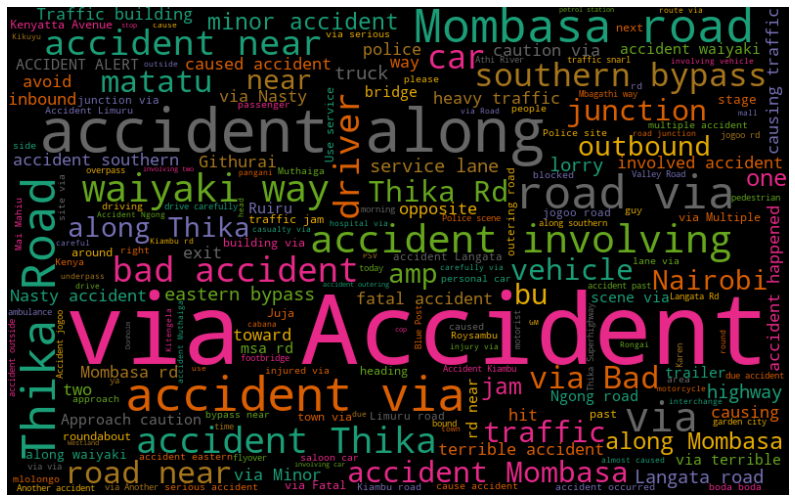

In [ ]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Negative']])
generate_wordcloud(all_words)

## Finding Accident Severity

In [ ]:
import re
import string
import nltk
import spacy
import pandas as pd
import numpy as np
import math
from tqdm import tqdm

from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

# pd.set_option('display.max_colwidth', 200)


def severity_finder(txt):

	# Sample text:
	#txt = "No injuries reported in three-car accident this morning."
	nlp = spacy.load("en_core_web_sm")
	txt = (''.join(str(Tweets_df.tidy_tweets.tolist())))
	doc = nlp(txt)
	lems = [x.lemma_ for x in doc]
	lems = " ".join(lems)
	doc2 = nlp(lems)

	# instantiate a new Matcher class object
	matcher = Matcher(nlp.vocab)

	# define the pattern for matcher
	pattern1 = [{'POS': {'IN': ['NUM', 'ADJ', 'NOUN']}},
					{'LOWER': {'IN': ['accident', 'accidents', 'incident', 'injury', 'damage', 'death']}, 'POS': 'NOUN'}]
	pattern2 = [{'LOWER': {'IN': ['no', 'none', 'major', 'minor', 'severe', 'bad']}},
					{'LOWER': {'IN': ['injured', 'injury', 'injure', 'hurt', 'damage', 'accident']}}]
	pattern3 = [{'POS': {'IN': ['NUM', 'ADJ', 'NOUN']}},
					{'LOWER': {'IN': ['injured', 'injury', 'injure', 'kill', 'die', 'damage', 'hit', 'bruise', 'crash']}, 'POS': 'VERB'}]
	pattern4 = [{'POS': 'NUM'}, {'LOWER': {
			'IN': ['vehicle', 'car', 'truck', 'semi', 'van', 'saloon', 'people', 'pedestrian', 'trailer', 'person', 'boda',
				   'motorcycle', 'nduthi', 'auto', 'bus', 'cyclist',  'lorry']}}]

	# add the pattern to the previously created matcher object
	matcher.add("Matching", None, pattern1, pattern2, pattern3, pattern4)

	#print("\n", lems, "\n")

	matches = matcher(doc2)
	spans = list()

	for match_id, start, end in matches:
		#print("****matching phrases***")
		# string_id = nlp.vocab.strings[match_id]
		span = doc[start:end]
		# print(span.text)
		spans.append(span)

	if len(spans)==0:
		spans.append("unknown severity")

	#print(spans)

	return spans

In [ ]:
# calling our function on the tidy tweets
df = severity_finder(Tweets_df['absolute_tidy_tweets'].fillna(0))

In [ ]:
# Previewing changes
# But the match phraser perfomed poorly
df

[Nasty accident,
 18:05 Accident,
 car hit,
 14:03 accident,
 Bad accident,
 road accident,
 small accident,
 road accident,
 07:58 Accident,
 10:36 Motorcycle,
 horrible accident,
 horrible accident,
 4-car accident,
 4-car accident,
 Multiple accident,
 multiple accident,
 10:03 Accident,
 17:47 accident,
 3 cars,
 07:40 accident,
 07:40 accident,
 road accident,
 evening accident,
 little accident,
 Terrible accident,
 Multiple accident,
 4 car,
 car accident,
 kusababisha accident,
 bus accident,
 fatal accident,
 fatal accident,
 13:53 accident,
 06:49 Accident,
 bad accident,
 15:52 Accident,
 21:05 Accident,
 two boda,
 22:06 accident,
 Nasty accident,
 highway accident,
 Nasty accident,
 bad accident,
 20:35 accident,
 Serious accident,
 06:55 Accident,
 16:13 accident,
 rare accident,
 serious accident,
 road accident,
 terrible accident,
 17:43 accident,
 traffic accident,
 07:34 accident,
 unfortunate accident,
 bad accident,
 bad accident,
 minor accidents,
 Serious acciden

## Using Spacy NER to Get Categories

In [ ]:
# Importing libraries
import spacy
from spacy.matcher import PhraseMatcher
import plac
from pathlib import Path
import random

In [ ]:
# Creating a function to match our desired categories
def offseter(lbl, doc, matchitem):
  o_one = len(str(Tweets_df[0:mathitem[1]]))
  subdoc = Tweets_df[matchitem[1]:matchitem[2]]
  o_two = o_one + len(str(subdoc))
  return (o_ne, o_two, lbl)

In [ ]:
# loading spacy ner
nlp = spacy.load('en')

if 'ner' not in nlp.pipe_names:
  ner = nlp.create_pipe('ner')
  nlp.add_pipe(ner)
else:
  ner = nlp.get_pipe('ner')

In [ ]:
# First label
label = 'MINOR'
matcher = PhraseMatcher(nlp.vocab)
for i in ['minor accident', 'minor', 'small',]:
  matcher.add(label, None, nlp(i))

In [ ]:
# Second label
label = 'MAJOR'
matcher = PhraseMatcher(nlp.vocab)
for i in ['freak accident', 'freak', 'grisly',]:
  matcher.add(label, None, nlp(i))

In [ ]:
pip install dframcy

In [ ]:
# Import a light-weight utility module to integrate Pandas Dataframe to spaCy's linguistic annotation and training tasks.
import spacy
from dframcy import DframCy

In [ ]:
# Running a function on the tidy tweets column to get our labels
Tweets_df['entities'] = preprocess_parallel(Tweets_df['tidy_tweets'], chunksize=100)

In [ ]:
# Previewing changes in which the function failed no labels found
Tweets_df.tail()

date  ... entities
7084  2016-01-03 09:44:17  ...       []
7085  2016-01-03 09:17:47  ...       []
7086  2016-01-03 08:12:27  ...       []
7087  2016-01-03 07:12:07  ...       []
7088  2016-01-01 13:09:01  ...       []

[5 rows x 5 columns]

## Using Ner-annotator to get labels

In [ ]:
pip install ner-annotator # Installing the annotator

     |████████████████████████████████| 61.1MB 53kB/s 
     |████████████████████████████████| 71kB 9.4MB/s 


In [ ]:
# Loading libraries to be used

from IPython.display import clear_output, display, display_html
from ipywidgets import Button, HTML, HBox, Text, Output, Layout
import pandas as pd
import spacy
from spacy import displacy
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import warnings

In [ ]:
# Importing spacy
import spacy_annotator as spa
import spacy

In [ ]:
# If loop to ensure the correct pipeline is loaded
nlp = spacy.load('en')

if 'ner' not in nlp.pipe_names:
  ner = nlp.create_pipe('ner')
  nlp.add_pipe(ner)
else:
  ner = nlp.get_pipe('ner')

In [ ]:
# First label
label = 'MINOR'
matcher = PhraseMatcher(nlp.vocab)
for i in ['minor accident', 'minor', 'small',]:
  matcher.add(label, None, nlp(i))

In [ ]:
# Second label
label = 'MAJOR'
matcher = PhraseMatcher(nlp.vocab)
for i in ['freak accident', 'freak', 'grisly',]:
  matcher.add(label, None, nlp(i))

In [ ]:
# Third label
label = 'IVOLVING'
matcher = PhraseMatcher(nlp.vocab)
for i in ['bus', 'matatu', 'tuktuk','saloon','boda',]:
  matcher.add(label, None, nlp(i))

In [ ]:
# Fourth label
label = 'INJURIES'
matcher = PhraseMatcher(nlp.vocab)
for i in ['injured', 'injuries', 'hurt',]:
  matcher.add(label, None, nlp(i))

In [ ]:
# Fifth Label
label = 'DEATHS'
matcher = PhraseMatcher(nlp.vocab)
for i in ['dead', 'deaths','casualties',]:
  matcher.add(label, None, nlp(i))

In [ ]:
# Assigning our annotator labels
annotator = spa.Annotator(labels= ["GPE","LOCATION", "TIME","MAJOR", "MINOR","INVOLVING","INJURIES","DEATHS"], model= nlp)

In [ ]:
# Running the annotator to manually label samples as training data
Tweets_df_lables = annotator.annotate(df=Tweets_df, col_text = "tidy_tweets", shuffle = True)

HTML(value='-1 examples annotated, 7090 examples left')

Text(value='', description='GPE', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='LOCATION', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='TIME', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='MAJOR', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='MINOR', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='INVOLVING', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three'…

Text(value='', description='INJURIES', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='DEATHS', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Output()

## Using Top2vec 

In [ ]:
# Installing necessary modules
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 6.4MB 13.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3MB 13.8MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 2.5MB 25.0MB/s 
     |████████████████████████████████| 1.2MB 57.2MB/s 
     |████████████████████████████████| 3.3MB 60.2MB/s 
     |████████████████████████████████| 901kB 57.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [ ]:
!pip install top2vec[indexing]
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]

  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
# Importing the Top2vec model
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

In [ ]:
#Preview our data set head
Tweets_df.head()

date  ...                               absolute_tidy_tweets
0  2021-06-17 11:42:39  ...   Who ever closed the footbridge crossing city ...
1  2021-06-17 05:47:09  ...   As reported Accident ole dume road car hit nd...
2  2021-06-16 13:03:09  ...   Freak accident involving a Wonderjoy trailer ...
3  2021-06-16 13:02:39  ...   Freak accident involving a Wonderjoy trailer ...
4  2021-06-16 11:03:09  ...   accident along mbagathi way has caused power ...

[5 rows x 4 columns]

In [ ]:
# Converting the target column into a list
docs = list(Tweets_df.loc[:, "absolute_tidy_tweets"].values)

In [ ]:
#Previewing changes
docs[:5]

[' Nasty accident along Ngong road right next to Lexo Petrol station after Jamhuri showground take caution as you approach via',
 ' Accident between PSV matatu and personal car on Kenyatta avenue outside Serena Hotel via',
 ' Who ever closed the footbridge crossing city square post office and KRA should be in jail People crossed that road get accidents daily via',
 ' As reported Accident ole dume road car hit nduthi guy car was on the wrongmwenye gari amejifungia ndani doesnt want to come out Few minutes ago via',
 ' Freak accident involving a Wonderjoy trailer truck along Kiambu Road Opposite AAR Hospital via']

In [ ]:
#Running the model on our list
model = Top2Vec(docs, embedding_model='universal-sentence-encoder')

2021-06-18 05:46:10,567 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-06-18 05:46:10,948 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-06-18 05:46:27,207 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-06-18 05:46:28,689 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-06-18 05:47:03,795 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dens

In [ ]:
# getting topic sizes
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
# getting topic numbers
model.get_num_topics()

53

In [ ]:
# Getting our texts into vectors
vectors = model._get_document_vectors()

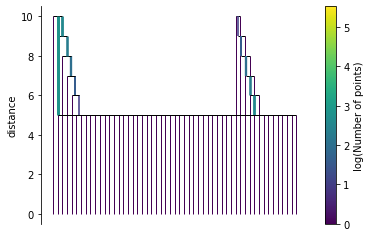

In [ ]:
# Trying to get our clusters for topics
import hdbscan
# from sklearn.datasets import make_blobs

clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=10)
cluster_labels = clusterer.fit_predict(topic_nums.reshape(-1, 1))
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(1, 5)
hierarchy.plot()

### Dimensionality Reduction of our vectors

In [ ]:
# Import libraries 
import matplotlib.pyplot as plt
import umap.umap_ as umap


In [ ]:
# Reducing the vectors to 2D
reduced2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', verbose=True).fit_transform(vectors)

UMAP(a=None, angular_rp_forest=True, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='cosine', metric_kwds=None,
     min_dist=0.1, n_components=2, n_epochs=None, n_jobs=-1, n_neighbors=15,
     negative_sample_rate=5, output_dens=False, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, ...)
Construct fuzzy simplicial set
Fri Jun 18 05:50:11 2021 Finding Nearest Neighbors
Fri Jun 18 05:50:11 2021 Building RP forest with 9 trees
Fri Jun 18 05:50:11 2021 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Fri Jun 18 05:50:12 2021 Finished Nearest Neighbor Sea

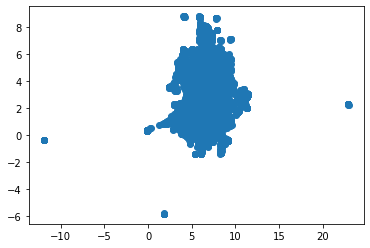

In [ ]:
# Observing our clusters
import matplotlib.pyplot as plt
x, y = reduced2d[:,0], reduced2d[:,1]
plt.scatter(x,y)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import umap.umap_ as umap

digits = reduced2d 
data = reduced2d.data

reducer = umap.UMAP(min_dist=0.1, n_components=2, n_neighbors=15, verbose=True)
reducer.fit(reduced2d.data)

embedding = reducer.transform(reduced2d.data)
# Verify that the result of calling transform is
# identical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24);

### Getting word clouds from topics

In [ ]:
# Importing Libraries
import umap
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd


import umap.plot
from sklearn.datasets import load_digits

digits = topic_nums.reshape(-1, 1)

mapper = umap.UMAP().fit(digits)
umap.plot.points(mapper, labels=digits)

In [ ]:
# Searching for topics that are in relation to certain key words
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["bypass"], num_topics=5)


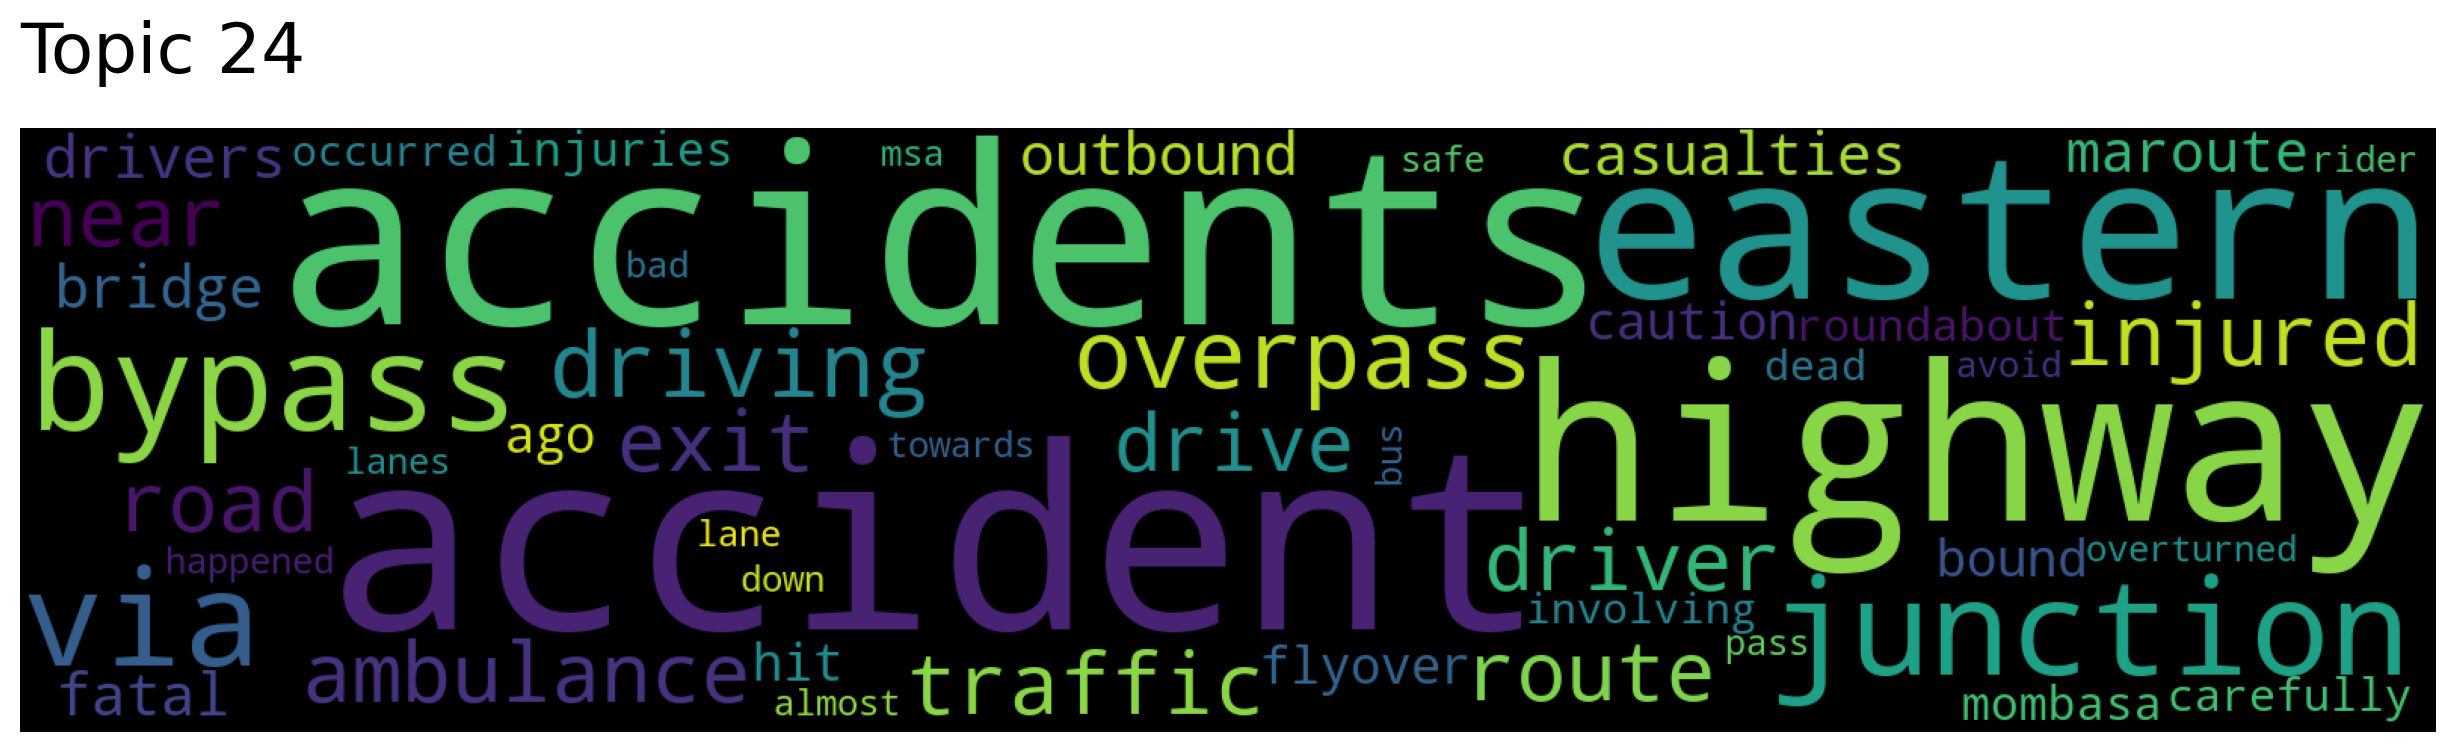

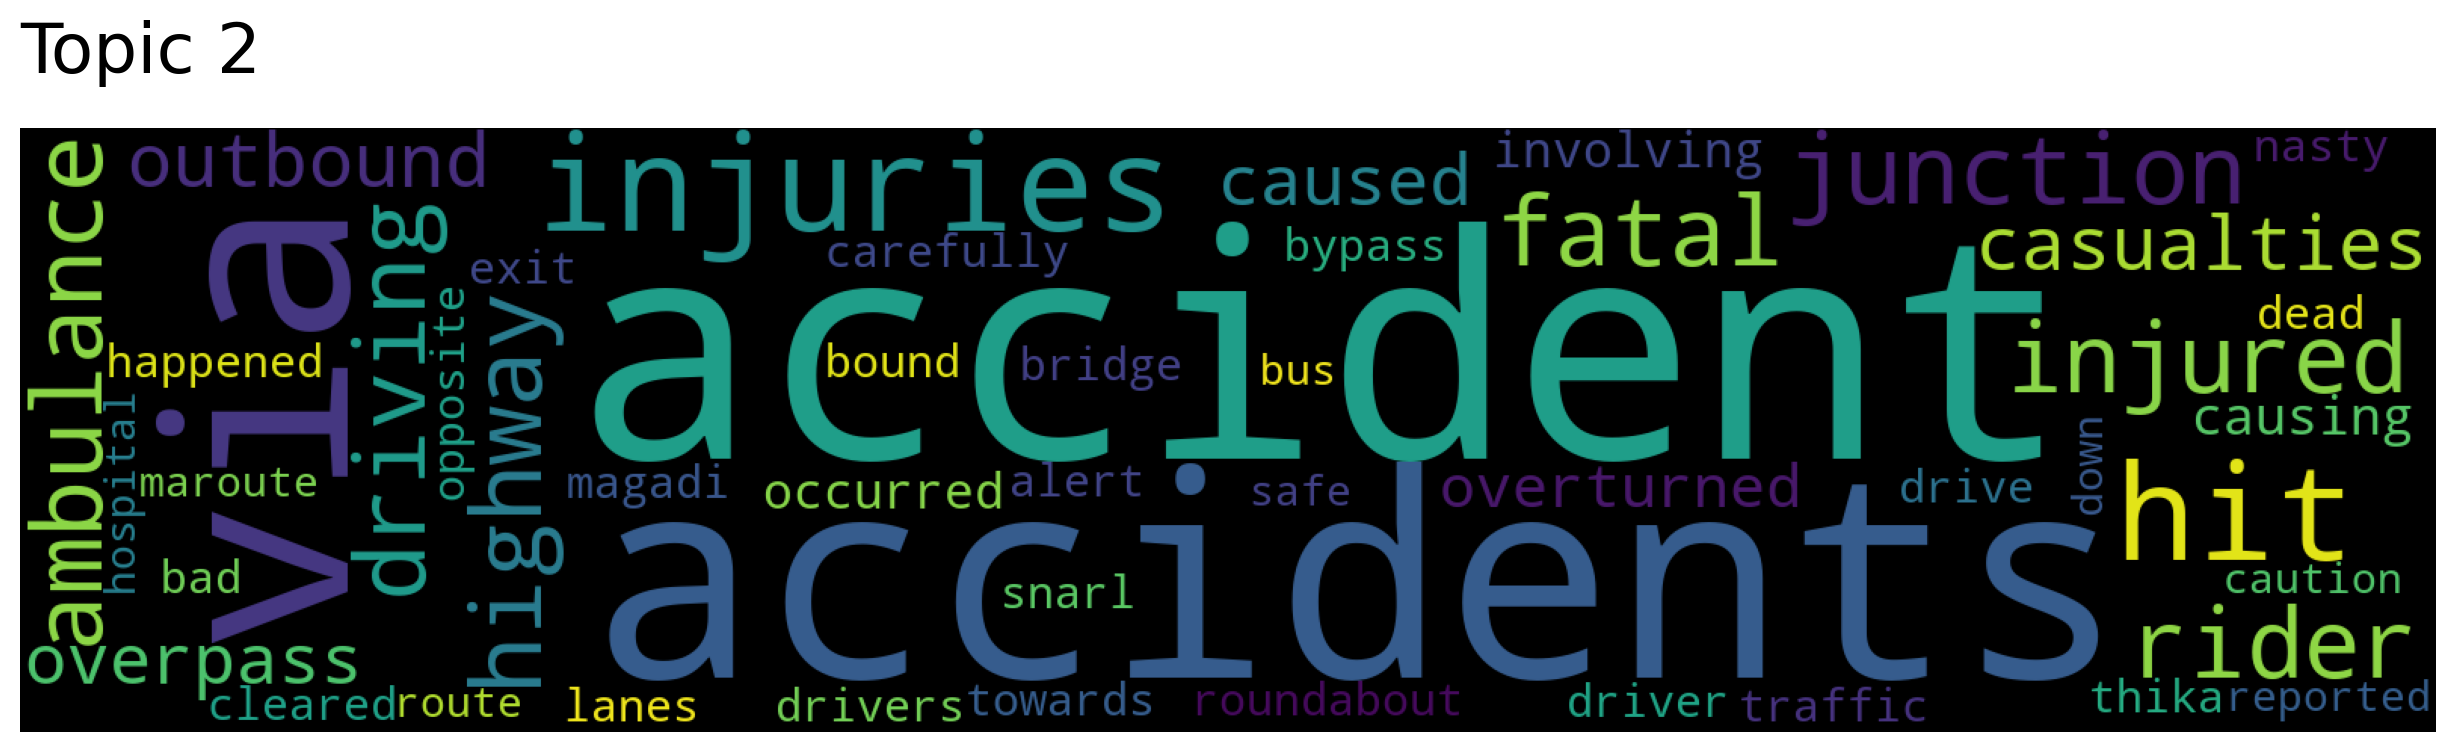

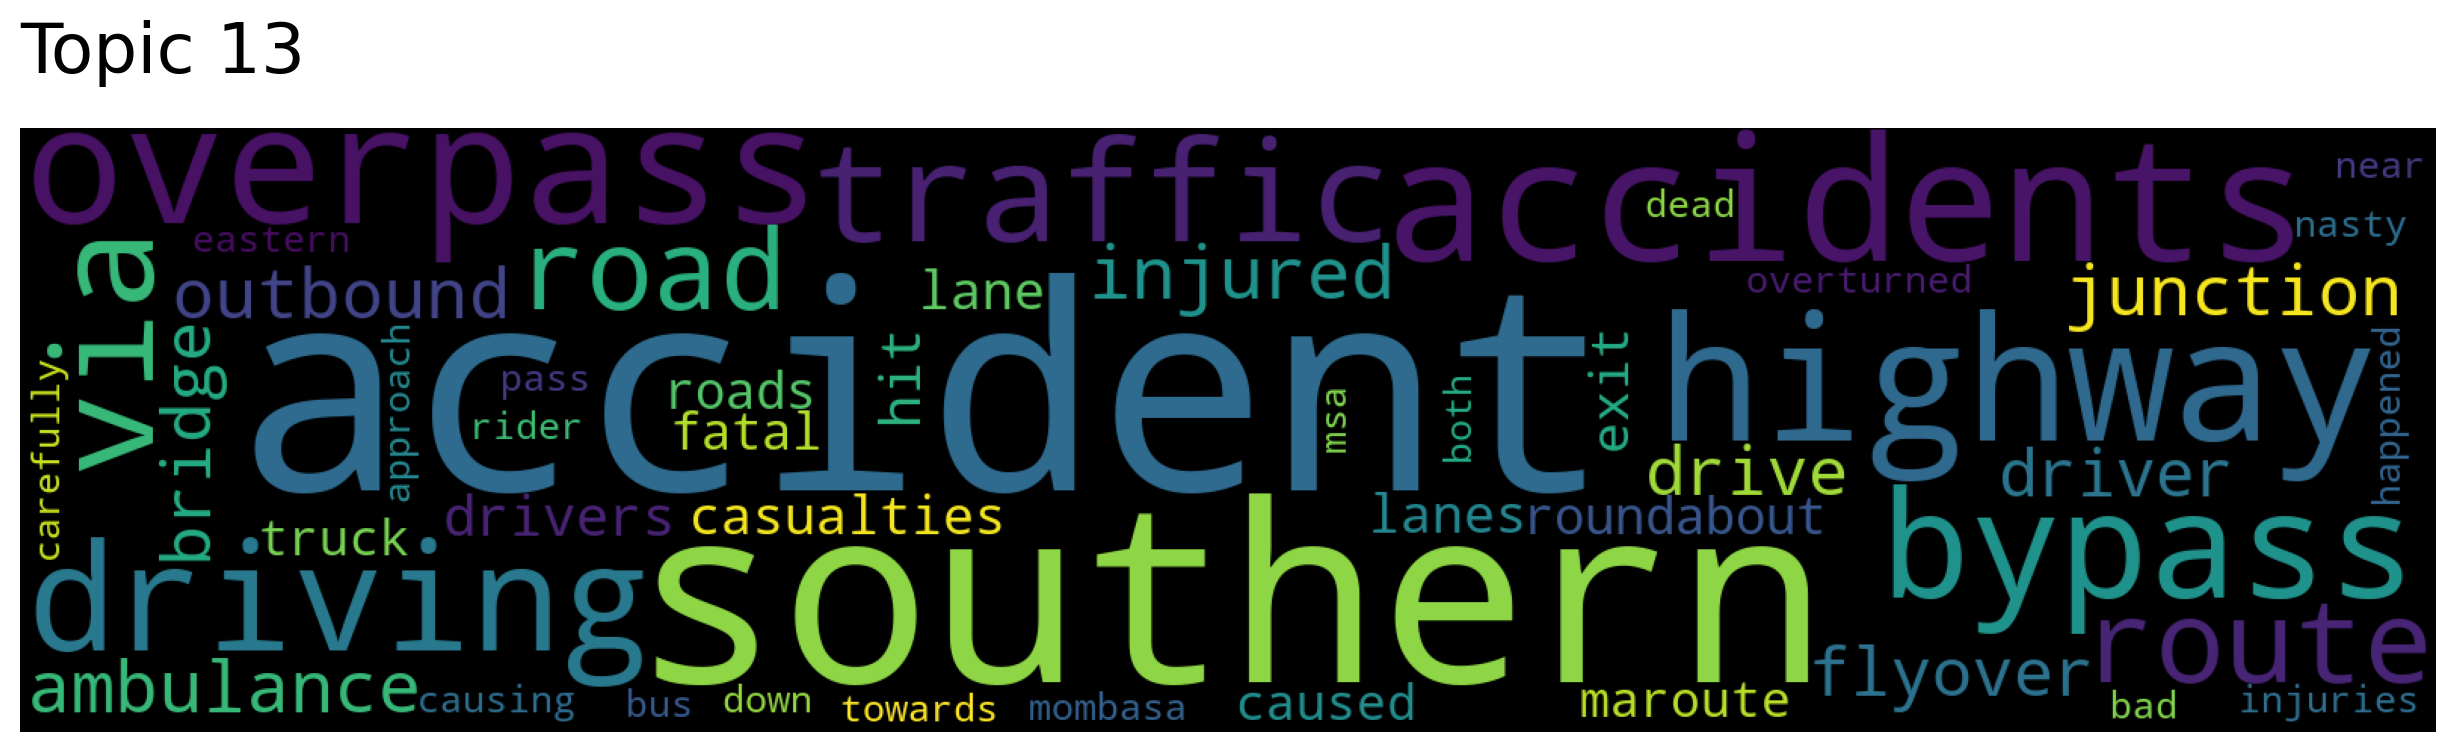

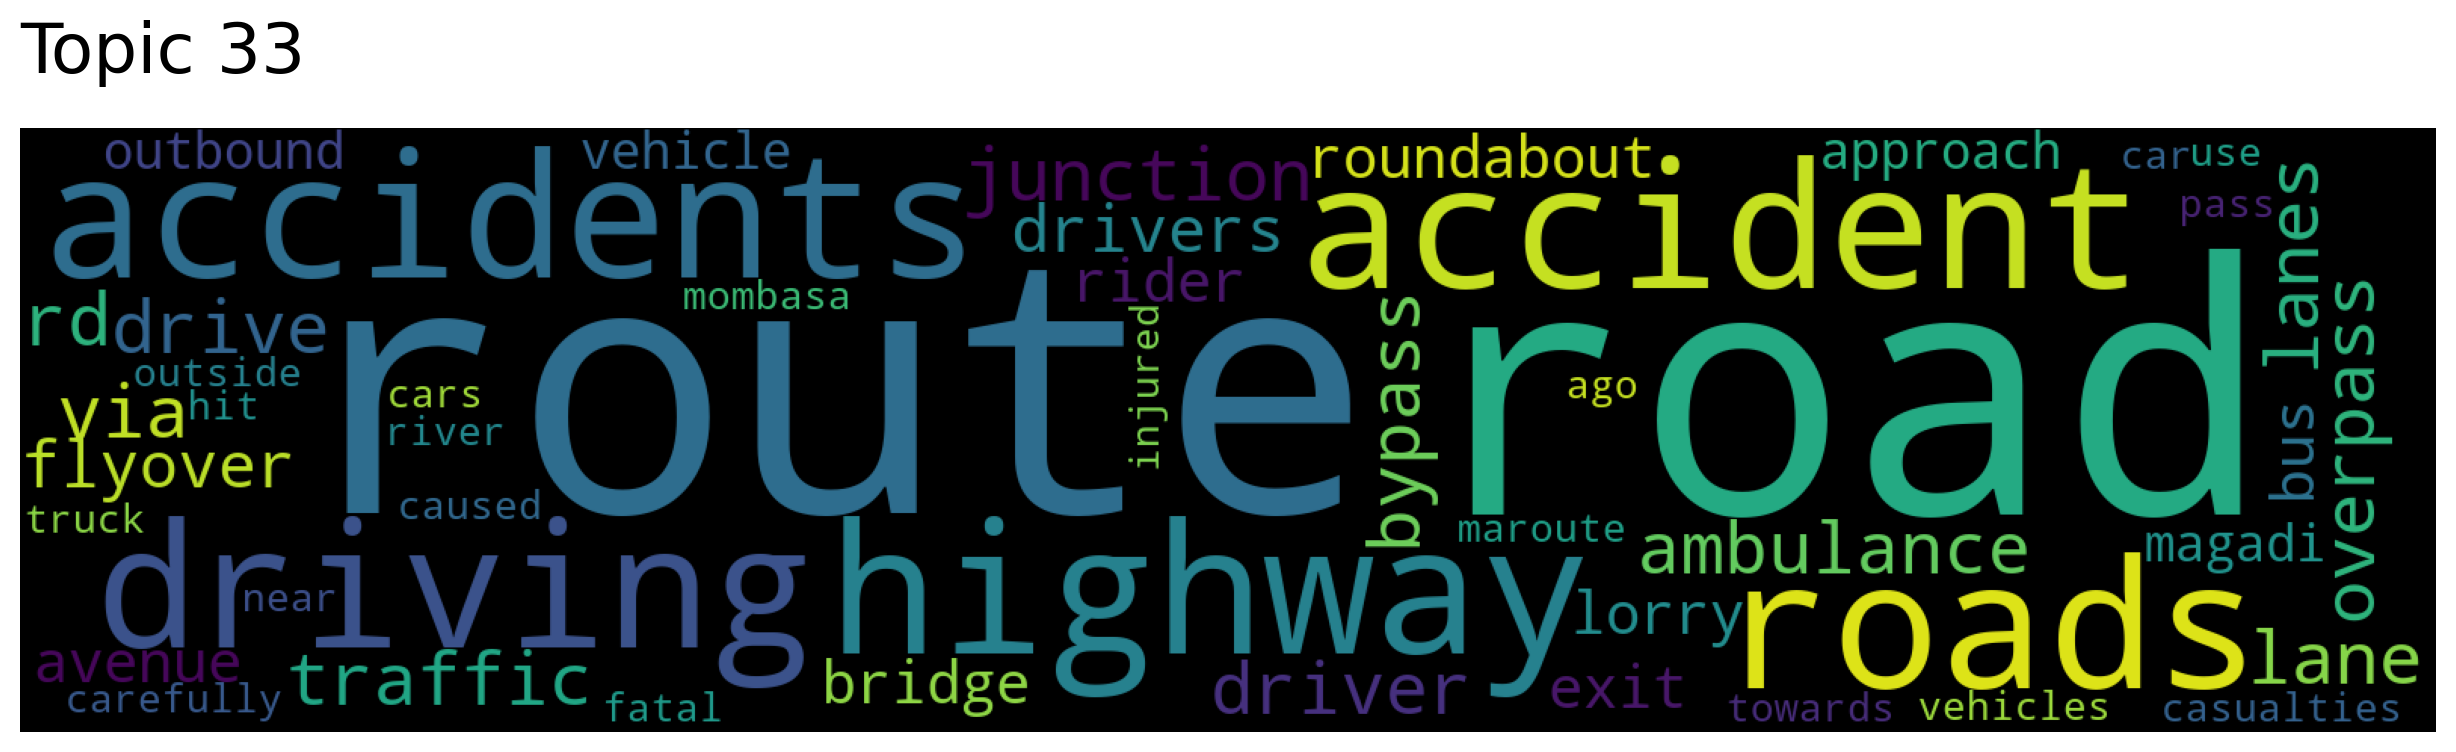

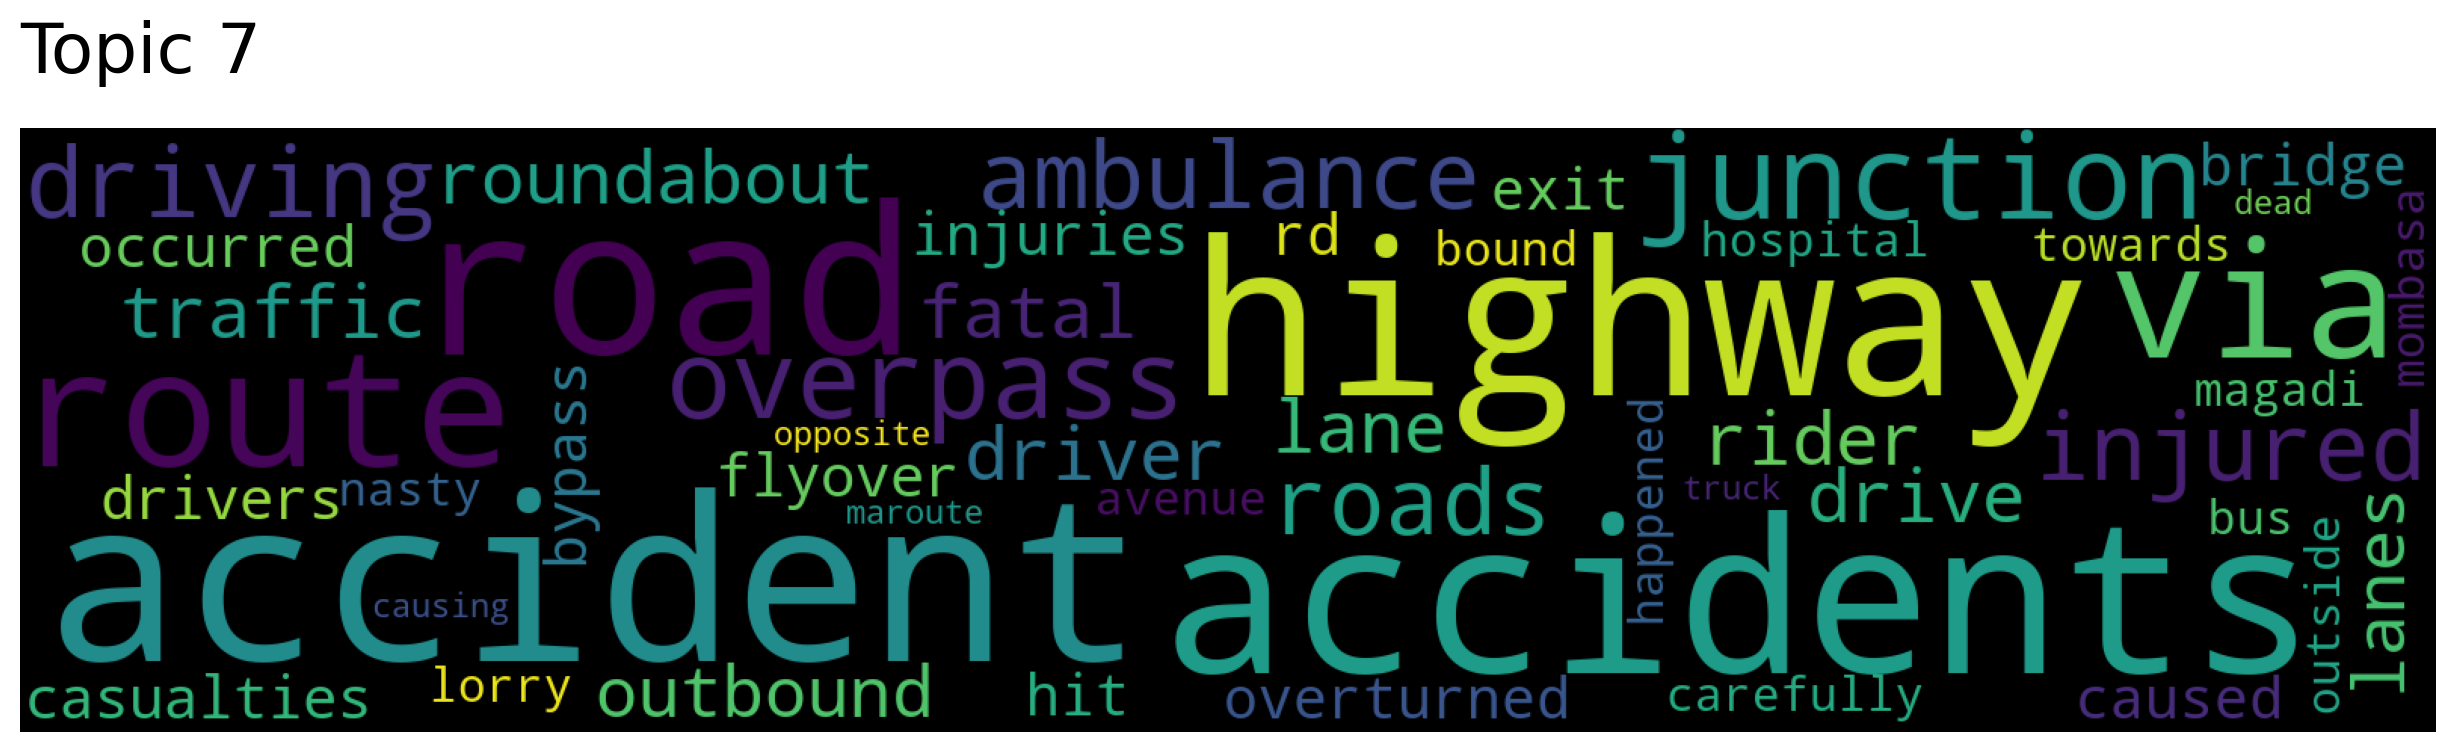

In [ ]:
# Showing the word cloud
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["bypass"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
# Finding tweets that are in relation to certain key words
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["fatal", "casualties","dead"], num_docs=100)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1881, Score: 0.5668373106748751
-----------
 Fatal accident via
-----------

Document: 4997, Score: 0.4803416429412203
-----------
 Accident via
-----------

Document: 4400, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 6247, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 4770, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 5300, Score: 0.48034161831315825
-----------
 accident via
-----------

Document: 6949, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 4843, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 5672, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 6243, Score: 0.48034161831315825
-----------
 accident a via
-----------

Document: 6249, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 4327, Score: 0.48034161831315825
-----------
 Accident via
-----------

Document: 

In [ ]:
# Getting words related to certain key words
words, word_scores = model.similar_words(keywords=["dead"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

still 0.5792195359603362
hit 0.5321610716447657
fatal 0.5292586189954254
off 0.5168631265077438
over 0.5114103925829444
out 0.5072315967646429
down 0.4980343132043082
up 0.4936888869589299
lost 0.4852824007919616
grisly 0.48214222567482057
back 0.48119691329590153
injured 0.47221746059341196
bad 0.4719282338794209
past 0.4658124269243241
accident 0.45613786805671863
nasty 0.4499472521247754
not 0.44824389515264756
been 0.4331173054987726
safe 0.43036312647503844
yet 0.4294821811956408


### Showing word clouds of four random topics

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(4)

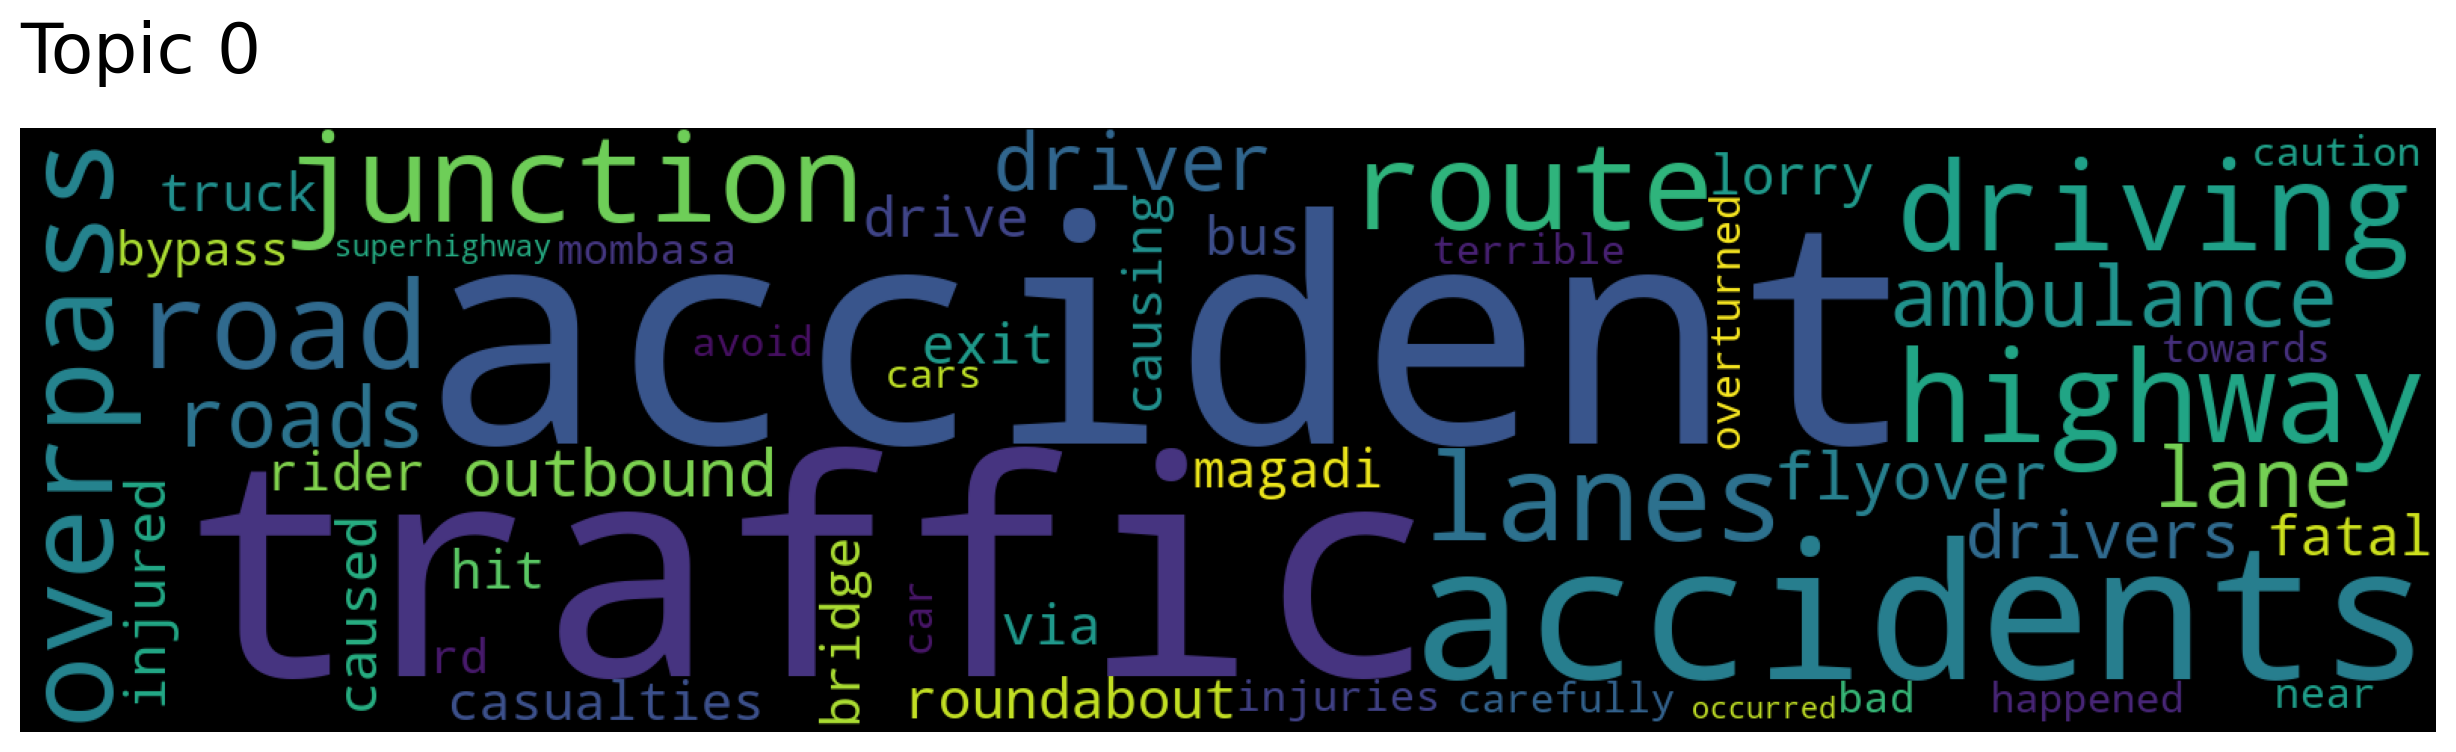

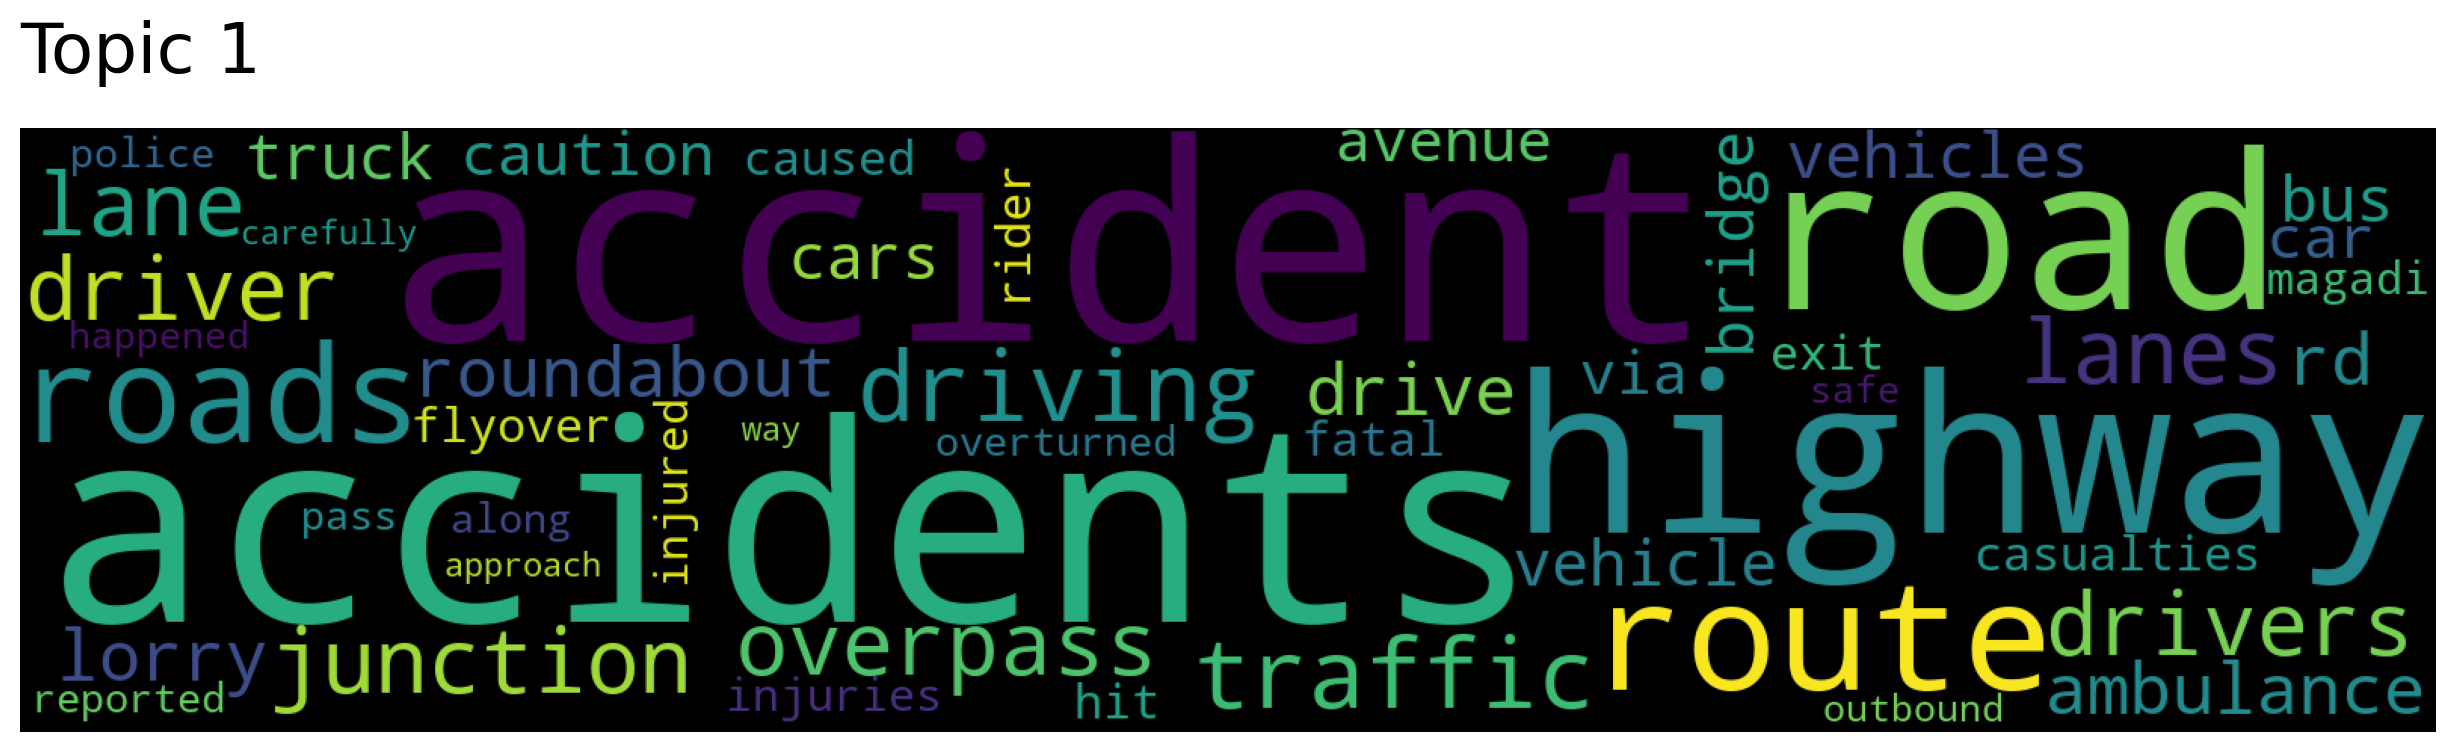

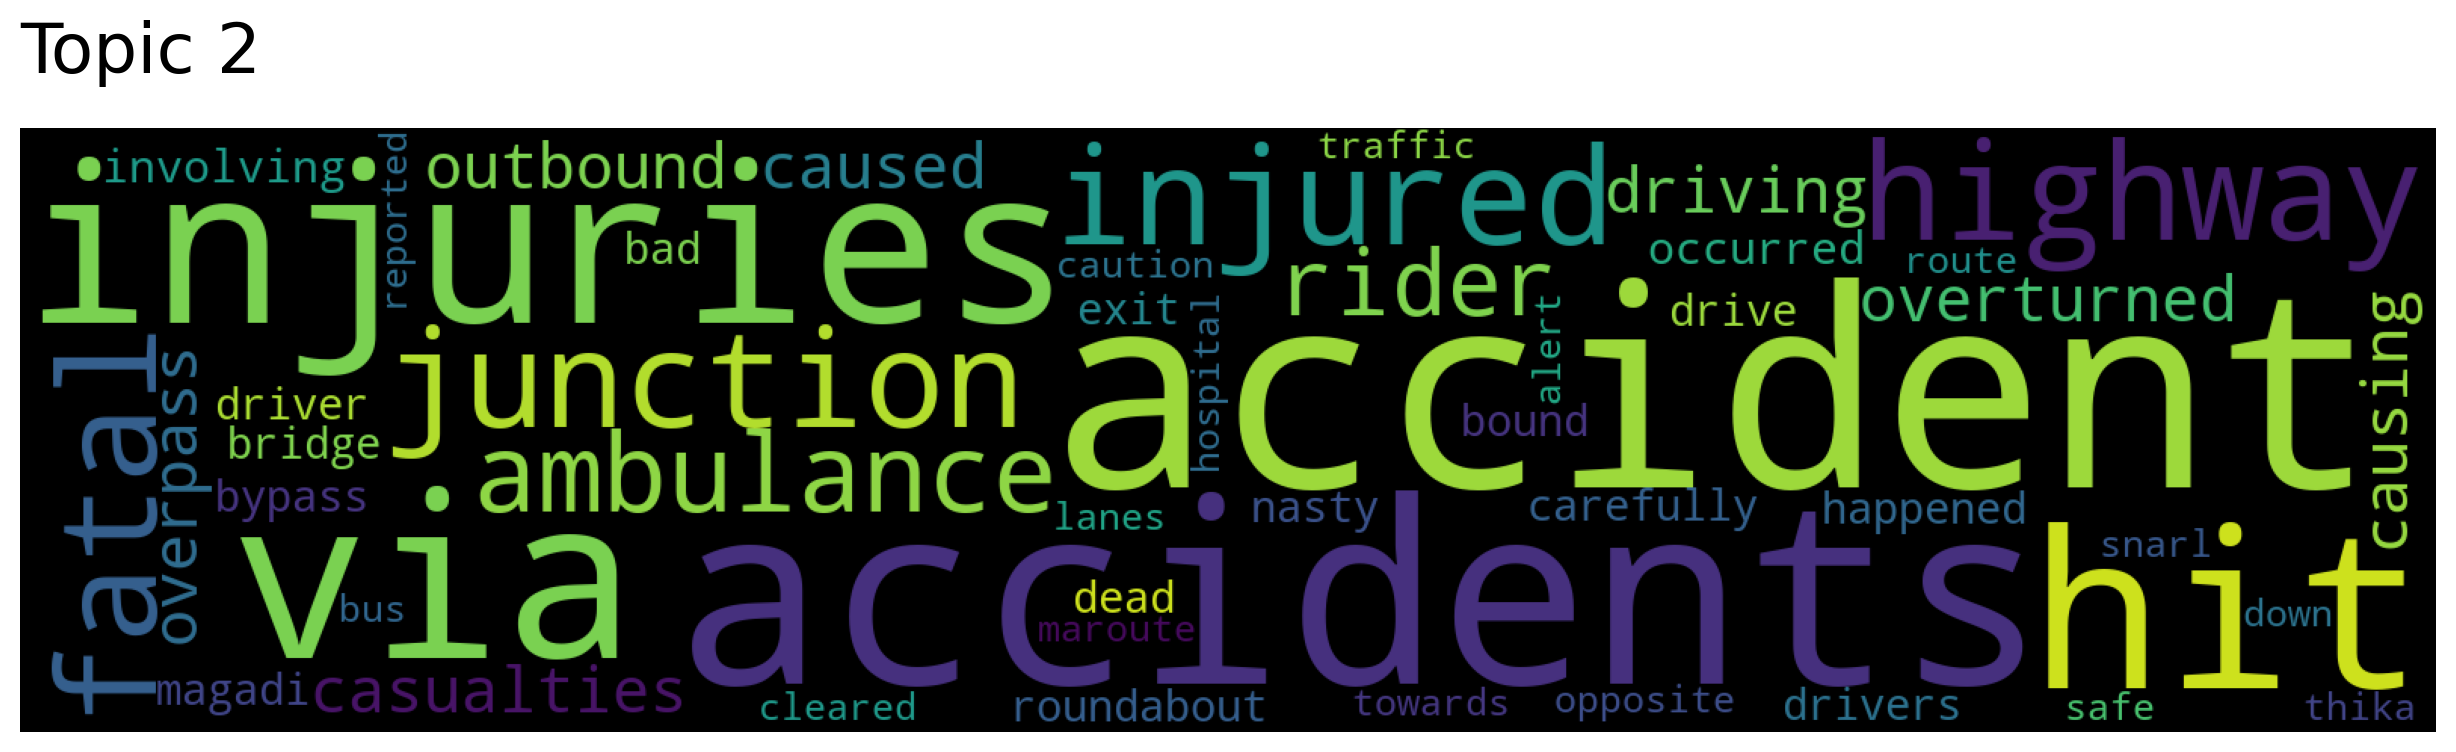

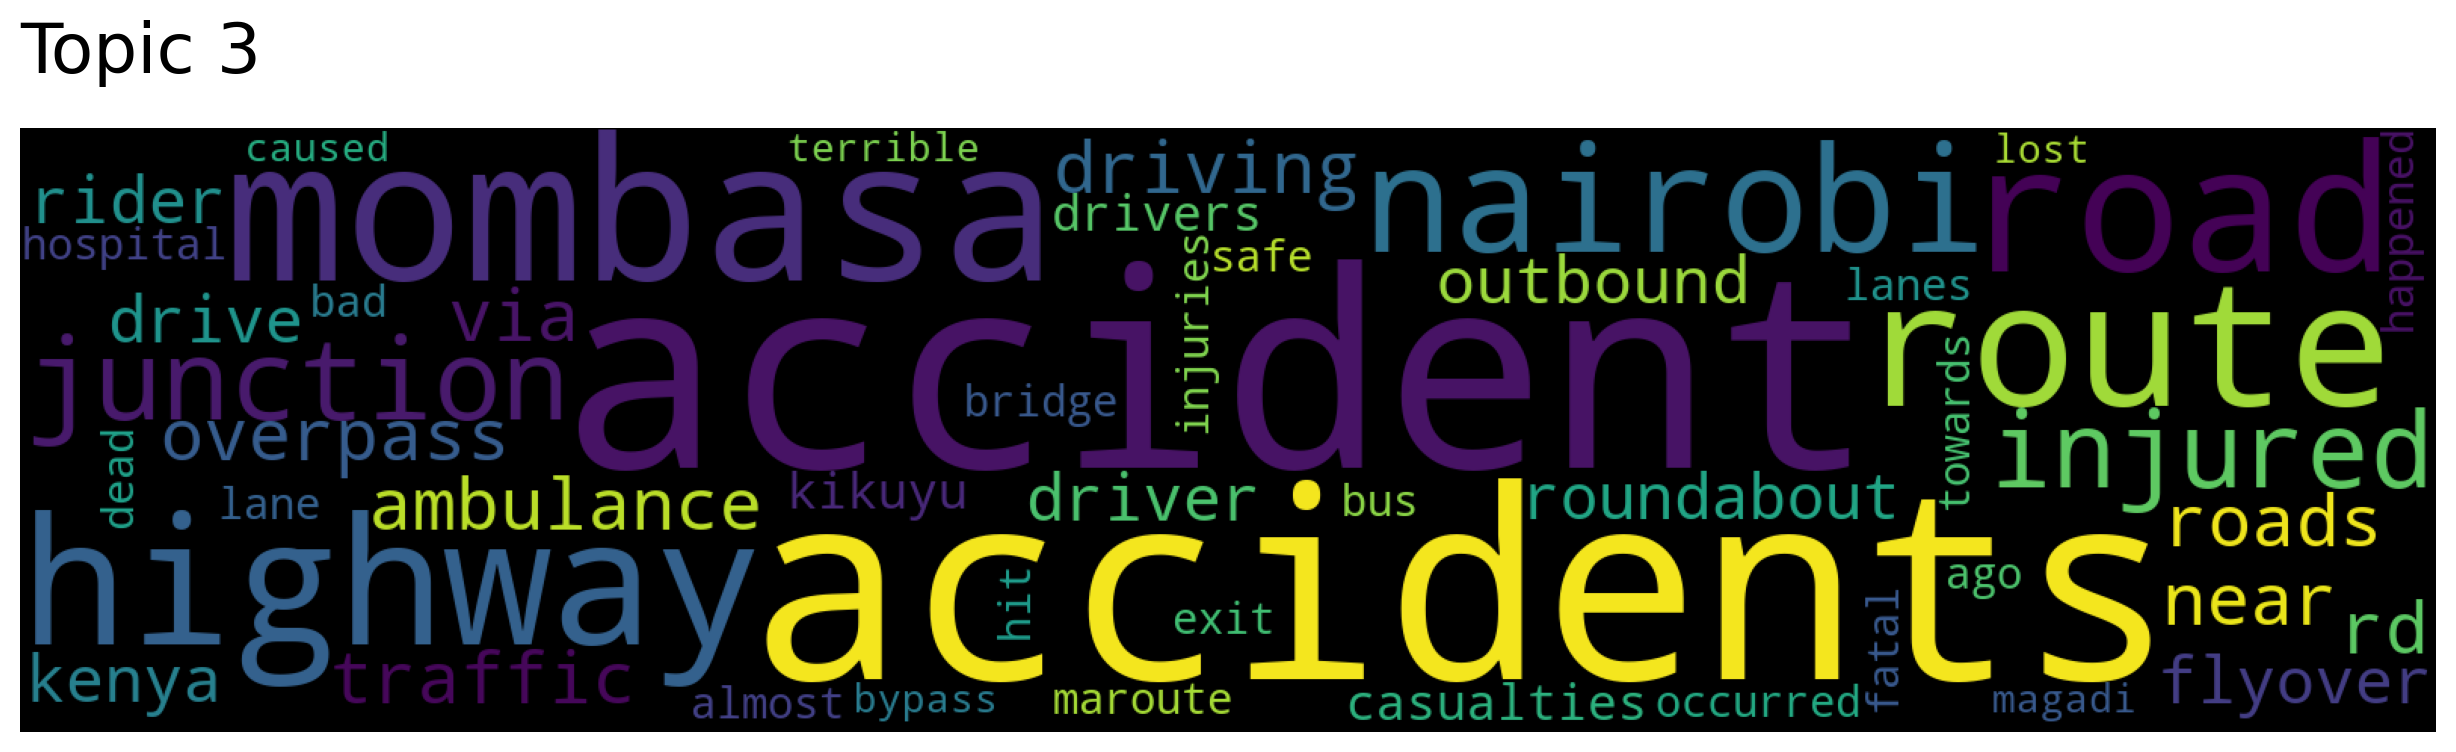

In [ ]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
 !python -m spacy download en_core_web_lg   

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180945 sha256=c928664b26947153f48491b4cd309de6ee399d6365e67afb03fca8b8eb803492
  Stored in directory: /tmp/pip-ephem-wheel-cache-kss5aee9/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
